# Multiple Objectives for Residential PV

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [1]:
#!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../../src"))

In [2]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/src/tyche/>.
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs(".")

In [5]:
investments = ty.Investments(".")

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Residential PV,numpy,pv_residential_simple,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices

Offset  \
Technology     Type    Index                 
Residential PV Capital BoS               2   
                       Inverter          1   
                       Module            0   
               Input   NaN               0   
               Metric  GHG               2   
                       LCOE              0   
                       Labor             1   
               Output  Electricity       0   

                                                              Description  \
Technology     Type    Index                                                
Residential PV Capital BoS                              balance of system   
                       Inverter                          system inverters   
                       Module                               system module   
               Input   NaN                                      no inputs   
               Metric  GHG                              reduction in GHGs   
                       LCOE         reduction in levelized cost of energy   
                       Labor                increase in spending on wages   
               Output  Electricity                  electricity generated   

                                   Notes  
Technology     Type    Index              
Residential PV Capital BoS                
                       Inverter           
                       Module             
               Input   NaN                
               Metric  GHG                
                       LCOE               
                       Labor              
               Output  Electricity

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs

Value  \
Technology     Scenario             Variable          Index               
Residential PV 2015 Actual          Input             NaN             0   
                                    Input efficiency  NaN             1   
                                    Input price       NaN             0   
                                    Lifetime          BoS             1   
                                                      Inverter        1   
...                                                                 ...   
               Module Slow Progress Lifetime          Inverter        1   
                                                      Module          1   
                                    Output efficiency Electricity     1   
                                    Output price      Electricity     0   
                                    Scale             NaN             1   

                                                                             Units  \
Technology     Scenario             Variable          Index                          
Residential PV 2015 Actual          Input             NaN                        1   
                                    Input efficiency  NaN                        1   
                                    Input price       NaN                        1   
                                    Lifetime          BoS          system-lifetime   
                                                      Inverter     system-lifetime   
...                                                                            ...   
               Module Slow Progress Lifetime          Inverter     system-lifetime   
                                                      Module       system-lifetime   
                                    Output efficiency Electricity              W/W   
                                    Output price      Electricity            $/kWh   
                                    Scale             NaN            system/system   

                                                                                                             Notes  
Technology     Scenario             Variable          Index                                                         
Residential PV 2015 Actual          Input             NaN                                                no inputs  
                                    Input efficiency  NaN                                                no inputs  
                                    Input price       NaN                                                no inputs  
                                    Lifetime          BoS                                per-lifetime computations  
                                                      Inverter                           per-lifetime computations  
...                                                                                                            ...  
               Module Slow Progress Lifetime          Inverter                           per-lifetime computations  
                                                      Module                             per-lifetime computations  
                                    Output efficiency Electricity  see parameter table for individual efficiencies  
                                    Output price      Electricity                   not tracking electricity price  
                                    Scale             NaN                                               no scaling  

[90 rows x 3 columns]

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters

Offset  \
Technology     Scenario             Parameter                      
Residential PV 2015 Actual          Customer Acquisition      19   
                                    DC-to-AC Ratio            15   
                                    Direct Labor              17   
                                    Discount Rate              0   
                                    Hardware Capital          16   
...                                                          ...   
               Module Slow Progress Module Lifetime            4   
                                    Module O&M Fixed           7   
                                    Module Soiling Loss       10   
                                    Permitting                18   
                                    System Size                2   

                                                                                           Value  \
Technology     Scenario             Parameter                                                      
Residential PV 2015 Actual          Customer Acquisition     st.triang(0.5, loc=2000, scale=0.2)   
                                    DC-to-AC Ratio        st.triang(0.5, loc=1.4, scale=0.00014)   
                                    Direct Labor             st.triang(0.5, loc=2000, scale=0.2)   
                                    Discount Rate                                           0.07   
                                    Hardware Capital         st.triang(0.5, loc=80, scale=0.008)   
...                                                                                          ...   
               Module Slow Progress Module Lifetime              st.triang(0.5, loc=26, scale=1)   
                                    Module O&M Fixed           st.triang(0.5, loc=19, scale=0.5)   
                                    Module Soiling Loss   st.triang(0.5, loc=0.05, scale=10E-06)   
                                    Permitting               st.triang(0.5, loc=600, scale=0.06)   
                                    System Size                                               36   

                                                             Units Notes  
Technology     Scenario             Parameter                             
Residential PV 2015 Actual          Customer Acquisition  $/system   BCA  
                                    DC-to-AC Ratio               1   IDC  
                                    Direct Labor          $/system   BLR  
                                    Discount Rate           1/year    DR  
                                    Hardware Capital         $/m^2   BCC  
...                                                            ...   ...  
               Module Slow Progress Module Lifetime             yr   MLT  
                                    Module O&M Fixed        $/kWyr   MOM  
                                    Module Soiling Loss          1   MSL  
                                    Permitting            $/system   BPR  
                                    System Size                m^2   SSZ  

[210 rows x 4 columns]

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results

Units Notes
Technology     Variable Index                            
Residential PV Cost     Cost               $/system      
               Metric   GHG          ŒîgCO2e/system      
                        LCOE                Œî$/kWh      
                        Labor            Œî$/system      
               Output   Electricity             kWh

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [12]:
investments.tranches

Amount Notes
Category     Tranche             Scenario                                   
BoS R&D      BoS High R&D        BoS Fast Progress            900000.0      
             BoS Low R&D         BoS Slow Progress            300000.0      
             BoS Medium R&D      BoS Moderate Progress        600000.0      
Inverter R&D Inverter High R&D   Inverter Fast Progress      3000000.0      
             Inverter Low R&D    Inverter Slow Progress      1000000.0      
             Inverter Medium R&D Inverter Moderate Progress  2000000.0      
Module R&D   Module High R&D     Module Fast Progress        4500000.0      
             Module Low R&D      Module Slow Progress        1500000.0      
             Module Medium R&D   Module Moderate Progress    3000000.0

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [13]:
investments.investments

Notes
Investment Category     Tranche                  
High R&D   BoS R&D      BoS High R&D             
           Inverter R&D Inverter High R&D        
           Module R&D   Module High R&D          
Low R&D    BoS R&D      BoS Low R&D              
           Inverter R&D Inverter Low R&D         
           Module R&D   Module Low R&D           
Medium R&D BoS R&D      BoS Medium R&D           
           Inverter R&D Inverter Medium R&D      
           Module R&D   Module Medium R&D

## Evaluate the scenarios in the dataset.

In [14]:
scenario_results = designs.evaluate_scenarios(sample_count=50)

Evaluating Residential PV


In [15]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value  \
Technology     Scenario                   Sample Variable Index                        
Residential PV 2015 Actual                1      Cost     Cost          19539.872779   
                                                 Metric   GHG              -0.004043   
                                                          LCOE             -0.000011   
                                                          Labor             0.004260   
                                                 Output   Electricity  184101.949620   
               BoS Fast Progress          1      Cost     Cost          17826.765493   
                                                 Metric   GHG              -0.009449   
                                                          LCOE              0.009288   
                                                          Labor          -454.799427   
                                                 Output   Electricity  184089.911779   
               BoS Moderate Progress      1      Cost     Cost          17948.985264   
                                                 Metric   GHG              -0.001975   
                                                          LCOE              0.008633   
                                                          Labor          -356.632711   
                                                 Output   Electricity  184106.555150   
               BoS Slow Progress          1      Cost     Cost          19027.390939   
                                                 Metric   GHG              -0.008803   
                                                          LCOE              0.002767   
                                                          Labor          -149.143162   
                                                 Output   Electricity  184091.351627   
               Inverter Fast Progress     1      Cost     Cost          17846.781369   
                                                 Metric   GHG               2.340960   
                                                          LCOE              0.011859   
                                                          Labor             0.067202   
                                                 Output   Electricity  189324.018315   
               Inverter Moderate Progress 1      Cost     Cost          18583.158162   
                                                 Metric   GHG               2.456440   
                                                          LCOE              0.008103   
                                                          Labor             0.071304   
                                                 Output   Electricity  189581.179167   
               Inverter Slow Progress     1      Cost     Cost          19243.584436   
                                                 Metric   GHG               2.009089   
                                                          LCOE              0.004083   
                                                          Labor            -0.035730   
                                                 Output   Electricity  188584.977941   
               Module Fast Progress       1      Cost     Cost          18798.620150   
                                                 Metric   GHG              50.398519   
                                                          LCOE              0.042690   
                                                          Labor             0.008291   
                                                 Output   Electricity  296343.001413   
               Module Moderate Progress   1      Cost     Cost          18918.426317   
                                                 Metric   GHG              41.842583   
                                                          LCOE              0.037899   
                                                          Labor            -0.024336   
                               

### Save results.

In [16]:
#scenario_results.to_csv("example-scenario.csv")

### Plot GHG metric.

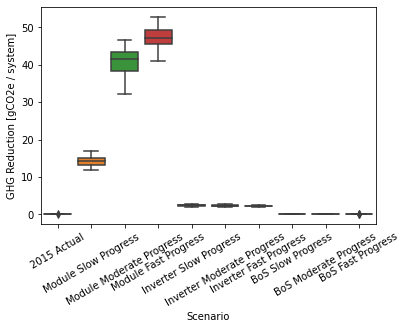

In [17]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "GHG"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Plot LCOE metric.

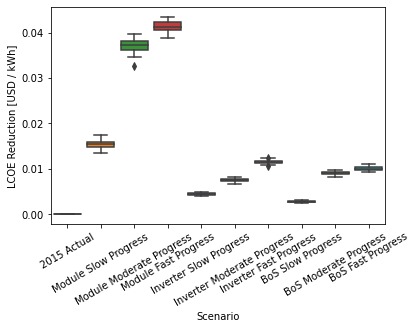

In [18]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "LCOE"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Plot labor metric.

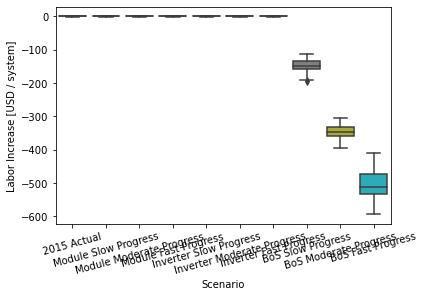

In [19]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "Labor"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Evaluate the investments in the dataset.

In [20]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

Evaluating Residential PV


### Costs of investments.

In [21]:
investment_results.amounts

,Amount
Investment,
High R&D,8400000.0
Low R&D,2800000.0
Medium R&D,5600000.0


### Benefits of investments.

In [22]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Investment Category     Tranche             Scenario                   Sample Technology     Index               
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG      0.002123   
                                                                                             LCOE     0.009778   
                                                                                             Labor -462.811427   
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG      0.002650   
                                                                                             LCOE     0.008724   
                                                                                             Labor -333.996733   
Low R&D    BoS R&D      BoS Low R&D         BoS Slow Progress          1      Residential PV GHG     -0.006594   
                                                                                             LCOE     0.002728   
                                                                                             Labor -148.422036   
High R&D   Inverter R&D Inverter High R&D   Inverter Fast Progress     1      Residential PV GHG      2.562379   
                                                                                             LCOE     0.011605   
                                                                                             Labor    0.038912   
Medium R&D Inverter R&D Inverter Medium R&D Inverter Moderate Progress 1      Residential PV GHG      2.564998   
                                                                                             LCOE     0.007541   
                                                                                             Labor    0.023787   
Low R&D    Inverter R&D Inverter Low R&D    Inverter Slow Progress     1      Residential PV GHG      2.081917   
                                                                                             LCOE     0.004173   
                                                                                             Labor   -0.038312   
High R&D   Module R&D   Module High R&D     Module Fast Progress       1      Residential PV GHG     42.226883   
                                                                                             LCOE     0.038560   
                                                                                             Labor    0.016178   
Medium R&D Module R&D   Module Medium R&D   Module Moderate Progress   1      Residential PV GHG     44.833565   
                                                                                             LCOE     0.039142   
                                                                                             Labor   -0.014056   
Low R&D    Module R&D   Module Low R&D      Module Slow Progress       1      Residential PV GHG     12.967545   
                                                                                             LCOE     0.014588   
                                                                                             Labor    0.044783   

                                                                                                             Units  
Investment Category     Tranche             Scenario                   Sample Technology     Index                  
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG    ŒîgCO2e/system  
                                                                                             LCOE          Œî$/kWh  
                                                                                             Labor      Œî$/system  
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG    ŒîgCO2e/system  
                                                                                             LCO

In [23]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

Value           Units
Investment Technology     Sample Index                            
High R&D   Residential PV 1      GHG     44.791385  ŒîgCO2e/system
                                 LCOE     0.059943         Œî$/kWh
                                 Labor -462.756337      Œî$/system
Medium R&D Residential PV 1      GHG     47.401214  ŒîgCO2e/system
                                 LCOE     0.055406         Œî$/kWh
                                 Labor -333.987002      Œî$/system
Low R&D    Residential PV 1      GHG     15.042867  ŒîgCO2e/system
                                 LCOE     0.021490         Œî$/kWh
                                 Labor -148.415566      Œî$/system

### Save results.

In [24]:
#investment_results.amounts.to_csv("example-investment-amounts.csv")

In [25]:
#investment_results.metrics.to_csv("example-investment-metrics.csv")

### Plot GHG metric.

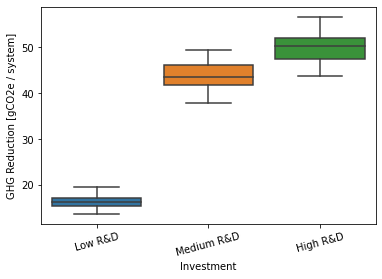

In [26]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).groupby(["Investment", "Sample"]).aggregate(np.sum).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot LCOE metric.

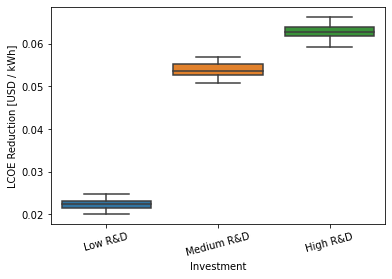

In [27]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "LCOE",
        level="Index"
    ).groupby(["Investment", "Sample"]).aggregate(np.sum).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot labor metric.

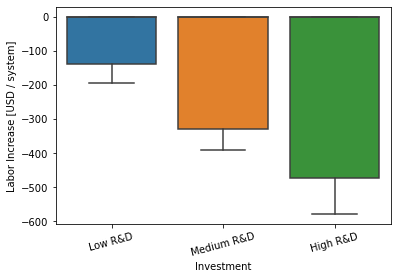

In [28]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Labor",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Multi-objective decision analysis.

### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [29]:
tranche_results = investments.evaluate_tranches(designs, sample_count=50)

Evaluating Residential PV


Display the cost of each tranche.

In [30]:
tranche_results.amounts

Amount
Category     Tranche                       
BoS R&D      BoS High R&D          900000.0
             BoS Low R&D           300000.0
             BoS Medium R&D        600000.0
Inverter R&D Inverter High R&D    3000000.0
             Inverter Low R&D     1000000.0
             Inverter Medium R&D  2000000.0
Module R&D   Module High R&D      4500000.0
             Module Low R&D       1500000.0
             Module Medium R&D    3000000.0

Display the metrics for each tranche.

In [31]:
tranche_results.summary

Value  \
Category   Technology     Tranche        Sample Index               
BoS R&D    Residential PV BoS High R&D   1      GHG      0.004099   
                                                LCOE     0.010340   
                                                Labor -531.775214   
                                         2      GHG     -0.011104   
                                                LCOE     0.010376   
...                                                           ...   
Module R&D Residential PV Module Low R&D 49     LCOE     0.015817   
                                                Labor    0.021244   
                                         50     GHG     12.215885   
                                                LCOE     0.013989   
                                                Labor    0.031912   

                                                                Units  
Category   Technology     Tranche        Sample Index                  
BoS R&D    Residential PV BoS High R&D   1      GHG    ŒîgCO2e/system  
                                                LCOE          Œî$/kWh  
                                                Labor      Œî$/system  
                                         2      GHG    ŒîgCO2e/system  
                                                LCOE          Œî$/kWh  
...                                                               ...  
Module R&D Residential PV Module Low R&D 49     LCOE          Œî$/kWh  
                                                Labor      Œî$/system  
                                         50     GHG    ŒîgCO2e/system  
                                                LCOE          Œî$/kWh  
                                                Labor      Œî$/system  

[1350 rows x 2 columns]

Save the results.

In [32]:
#tranche_results.amounts.to_csv("example-tranche-amounts.csv")
#tranche_results.summary.to_csv("example-tranche-summary.csv")

### Fit a response surface to the results.

The response surface interpolates between the discrete set of cases provided in the expert elicitation. This allows us to study funding levels intermediate between those scenarios.

In [33]:
evaluator = ty.Evaluator(investments.tranches, tranche_results.summary)

Here are the categories of investment and the maximum amount that could be invested in each:

In [34]:
evaluator.max_amount

,Amount
Category,
BoS R&D,900000.0
Inverter R&D,3000000.0
Module R&D,4500000.0


Here are the metrics and their units of measure:

In [35]:
evaluator.units

,Units
Index,
GHG,ŒîgCO2e/system
LCOE,Œî$/kWh
Labor,Œî$/system


#### Example interpolation.

Let's evaluate the case where each category is invested in at half of its maximum amount.

In [36]:
example_investments = evaluator.max_amount / 2
example_investments

,Amount
Category,
BoS R&D,450000.0
Inverter R&D,1500000.0
Module R&D,2250000.0


In [37]:
evaluator.evaluate(example_investments)

Category    Index  Sample
BoS R&D     GHG    1         -0.004826883697845119
                   2         0.0014509163266680503
                   3         -0.004532046249259736
                   4            -0.005797414077648
                   5          -0.00386154116092996
                                     ...          
Module R&D  Labor  46         0.054110837495500164
                   47         0.008674836960267385
                   48          0.01590248655531923
                   49         -0.02008645632020034
                   50         0.025034956305262313
Name: Value, Length: 450, dtype: object

Let's evaluate the mean instead of outputing the whole distribution.

In [38]:
evaluator.evaluate_statistic(example_investments, np.mean)

Index
GHG       30.076373
LCOE       0.038157
Labor   -246.791822
Name: Value, dtype: float64

Here is the standard deviation:

In [39]:
evaluator.evaluate_statistic(example_investments, np.std)

Index
GHG       1.496332
LCOE      0.000843
Labor    15.241433
Name: Value, dtype: float64

A risk-averse decision maker might be interested in the 10% percentile:

In [40]:
evaluator.evaluate_statistic(example_investments, lambda x: np.quantile(x, 0.1))

Index
GHG       28.282744
LCOE       0.037222
Labor   -264.023703
Name: Value, dtype: float64

### ε-Constraint multiobjective optimization

In [41]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

In order to meaningfully map the decision space, we need to know the maximum values for each of the metrics.

#### Example optimization.

Limit spending to $3M.

In [42]:
investment_max = 3e6

Require that the GHG reduction be at least 40 gCO2e/system and that the Labor wages not decrease.

In [43]:
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])
metric_min

GHG      40
Labor     0
Name: Value, dtype: int64

Compute the ε-constrained maximum for the LCOE.

In [44]:
optimum = optimizer.opt_slsqp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = np.mean       ,
)
optimum.exit_message

'Optimization terminated successfully'

Here are the optimal spending levels:

In [45]:
np.round(optimum.amounts)

Category
BoS R&D          600000.0
Inverter R&D          0.0
Module R&D      2400000.0
Name: Amount, dtype: float64

Here are the three metrics at that optimum:

In [46]:
optimum.metrics

Index
GHG       32.769314
LCOE       0.038900
Labor   -345.104363
Name: Value, dtype: float64

*Thus, by putting all of the investment into Module R&D, we can expected to achieve a mean 3.75 ¢/kWh reduction in LCOE under the GHG and Labor constraints.*

It turns out that there is no solution for these constraints if we evaluate the 10th percentile of the metrics, for a risk-averse decision maker.

In [47]:
optimum = optimizer.opt_slsqp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = lambda x: np.quantile(x, 0.1),
)
optimum.exit_message

'Optimization terminated successfully'

Let's try again, but with a less stringent set of constraints, only constraining GHG somewhat  but not Labor at all.

In [48]:
optimum = optimizer.opt_slsqp(
    "LCOE"                                                         ,
    total_amount = investment_max                                  ,
    statistic    = lambda x: np.quantile(x, 0.1)                   ,
)
optimum.exit_message

opt_slsqp: No optimization sense specified; maximizing objective function


'Optimization terminated successfully'

In [49]:
np.round(optimum.amounts)

Category
BoS R&D          599997.0
Inverter R&D          0.0
Module R&D      2400003.0
Name: Amount, dtype: float64

In [50]:
optimum.metrics

Index
GHG       29.917253
LCOE       0.036940
Labor   -373.920779
Name: Value, dtype: float64

### Example MILP optimization

This formulation converts the original non-linear optimization into a piecewise linear, mixed-integer optimization, and then attempts to solve the same problem.

As written, the MILP formulation is infeasible.

In [51]:
investment_max = 3e6
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])

optimum = optimizer.opt_milp(
    "LCOE"                       ,
    total_amount = investment_max,
    statistic    = np.mean       ,
)

optimum.exit_message

opt_milp: No optimization sense provided; Maximizing objective


<OptimizationStatus.OPTIMAL: 0>

Let's determine if the problem is truly infeasible or if the solver is failing by examining the underlying data.

In [52]:
_wide = evaluator.evaluate_corners_wide(np.mean).reset_index()
_wide

Index,BoS R&D,Inverter R&D,Module R&D,GHG,LCOE,Labor
0,300000.0,1000000.0,1500000.0,16.679622,0.022634,-148.493163
1,300000.0,1000000.0,3000000.0,43.481273,0.044449,-148.488799
2,300000.0,1000000.0,4500000.0,49.347495,0.048254,-148.471148
3,300000.0,2000000.0,1500000.0,16.671198,0.025662,-148.487046
4,300000.0,2000000.0,3000000.0,43.472849,0.047476,-148.482683
5,300000.0,2000000.0,4500000.0,49.339071,0.051281,-148.465031
6,300000.0,3000000.0,1500000.0,16.697506,0.029772,-148.488240
7,300000.0,3000000.0,3000000.0,43.499157,0.051586,-148.483876
8,300000.0,3000000.0,4500000.0,49.365379,0.055391,-148.466225
9,600000.0,1000000.0,1500000.0,16.679897,0.028839,-345.100961


Add a column to the above data with the total investment amount.

In [53]:
_wide['total R&D'] = _wide.loc[:,'BoS R&D'] + _wide.loc[:, 'Inverter R&D'] + _wide.loc[:, 'Module R&D']
_wide

Index,BoS R&D,Inverter R&D,Module R&D,GHG,LCOE,Labor,total R&D
0,300000.0,1000000.0,1500000.0,16.679622,0.022634,-148.493163,2800000.0
1,300000.0,1000000.0,3000000.0,43.481273,0.044449,-148.488799,4300000.0
2,300000.0,1000000.0,4500000.0,49.347495,0.048254,-148.471148,5800000.0
3,300000.0,2000000.0,1500000.0,16.671198,0.025662,-148.487046,3800000.0
4,300000.0,2000000.0,3000000.0,43.472849,0.047476,-148.482683,5300000.0
5,300000.0,2000000.0,4500000.0,49.339071,0.051281,-148.465031,6800000.0
6,300000.0,3000000.0,1500000.0,16.697506,0.029772,-148.488240,4800000.0
7,300000.0,3000000.0,3000000.0,43.499157,0.051586,-148.483876,6300000.0
8,300000.0,3000000.0,4500000.0,49.365379,0.055391,-148.466225,7800000.0
9,600000.0,1000000.0,1500000.0,16.679897,0.028839,-345.100961,3100000.0


Look for entries that meet the total investment constraint of less than $3 MM.

In [54]:
_wide.loc[_wide['total R&D'] <= 3e6,:]

Index,BoS R&D,Inverter R&D,Module R&D,GHG,LCOE,Labor,total R&D
0,300000.0,1000000.0,1500000.0,16.679622,0.022634,-148.493163,2800000.0


This entry does not meet the GHG constraint, which is why the MILP formulation is infeasible.

To find a feasible solution, data points that include investments of $0 need to be included in the above dataset. Currently the tranches for this formulation only include non-zero investments:

In [55]:
tranche_results.amounts

Amount
Category     Tranche                       
BoS R&D      BoS High R&D          900000.0
             BoS Low R&D           300000.0
             BoS Medium R&D        600000.0
Inverter R&D Inverter High R&D    3000000.0
             Inverter Low R&D     1000000.0
             Inverter Medium R&D  2000000.0
Module R&D   Module High R&D      4500000.0
             Module Low R&D       1500000.0
             Module Medium R&D    3000000.0